In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np

import utils
import generators
import functionals
import bases
import representations

def get_torus_obs_krylov(initial_state=(0,0), num_col=100):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.two_torus_observable_func, initial_state, num_col)

def get_torus_evo_krylov(initial_state=(0,0), num_col=100):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.full_state_observable, initial_state, num_col)

def get_circle_obs_krylov(initial_state=0, num_col=200):
    return utils.generate_krylov(generators.angle_evolution, generators.full_state_observable, initial_state, num_col)

def check_eigen_property_difference(L, V, basis, degree):
    """Check the difference of |phi(T(s)) - lambda phi(s)|
    """
    print("----- {:>20}".format("eigenvalue/function difference check"))
    print("{:>15}, {:>5}, {:>5}".format("original", "abs", "eig diff avg"))
    angles = []
    max_idx = 0
    for idx in range(len(L)):
        l = L[idx]
        v = V[idx]
        k = v.shape[0]
        phi = lambda x: basis(x, degree=degree)[:,:k] @ v
        abs_hist = []
        for state in range(10):
            state = state % (2*np.pi)
            right = l * phi(state)
            left = phi(generators.angle_evolution(state))
            abs_hist.append(abs(left-right)[0])
        l = l.item()
        print("{:>15}, {:>5.2f}, {:>5.2f}".format(utils.round_complex_number(l, decimal=2), abs(l), sum(abs_hist) / len(abs_hist)))
        angle = np.angle(l)
        angles.append(angle)
        if abs(L[max_idx] - 1) < 1e-1 or abs(abs(l) - 1) < abs(abs(L[max_idx]) - 1):
            max_idx = idx
    return max_idx, angles

def check_eigen_power_difference(L, V, basis, degree, max_idx, angles):
    v_max = V[max_idx]
    k_max = v_max.shape[0]
    print("----- {:>20}".format("power difference check"))
    phi_max = lambda x: basis(x, degree=degree)[:,:k_max] @ v_max
    print("{:>8}, {:>5}, {:>5}, {:>5}, {:>10}".format("max_idx", "idx", "p", "state", "power diff"))
    total_diff = []
    for idx, l in enumerate(L):
        p = angles[idx] / angles[max_idx] % (2*np.pi)
        v = V[idx]
        k = v.shape[0]
        phi = lambda x: basis(x, degree=degree)[:,:k] @ v
        for state in range(10):
            state = state % (2*np.pi)
            diff = abs(phi(state) - phi_max(state)**p)
            total_diff.append(diff)
            # if diff > 1:
                # print("{:>8}, {:>5}, {:>5.2f}, {:>5.2f}, {:>10.2f}".format(max_idx, idx, p, state, diff[0]))
    np_diff = np.array(total_diff)
    print("diff total {:>5.2f} average {:>5.2f} std {:>5.2f}".format(np.sum(np_diff), np.average(np_diff), np.std(np_diff)))
    return

def check_eigen_power_inner_product(L, V, basis, degree, max_idx, angles):
    v_max = V[max_idx]
    k_max = v_max.shape[0]
    print("----- {:>20}".format("check_eigen_power_inner_product check"))
    phi_max = lambda x: basis(x, degree=degree)[:,:k_max] @ v_max
    print("{:>8}, {:>5}, {:>5}, {:>5}, {:>10}".format("max_idx", "idx", "j", "p", "power inner diff"))
    total_diff = []
    for idx, l in enumerate(L):
        p = angles[idx] / angles[max_idx] % (2*np.pi)
        varphi_p = lambda x: phi_max(x)**p
        v = V[idx]
        v_pred = []
        for j, vj in enumerate(v):
            phi_j = lambda x: basis(x, degree=degree)[:,j]
            pred_vj = functionals.functional_inner_product(varphi_p, phi_j, -np.pi, np.pi, 100)
            v_pred.append(pred_vj)
        diff = np.linalg.norm(np.array(v-v_pred))
        total_diff.append(diff)
        if diff>1:
            print("{:>8}, {:>5}, {:>5}, {:>5.2f}, {:>10.2f}".format(max_idx, idx, j, p, diff))
    np_diff = np.array(total_diff)
    print("diff total {:>5.2f} average {:>5.2f} std {:>5.2f}".format(np.sum(np_diff), np.average(np_diff), np.std(np_diff)))
    return

def show_results(U, basis, degree, representation=representations.mpEDMD_matrix_representation):
    K, V, L = representation(U, degree=degree, basis=basis)

    utils.plot_complex_on_unit_circle(L)
    max_idx, angles = check_eigen_property_difference(L, V, basis, degree)
    check_eigen_power_difference(L, V, basis, degree, max_idx, angles)
    check_eigen_power_inner_product(L, V, basis, degree, max_idx, angles)
    return

# Unit circle rotation (1D)

Ut shape(200, 1)


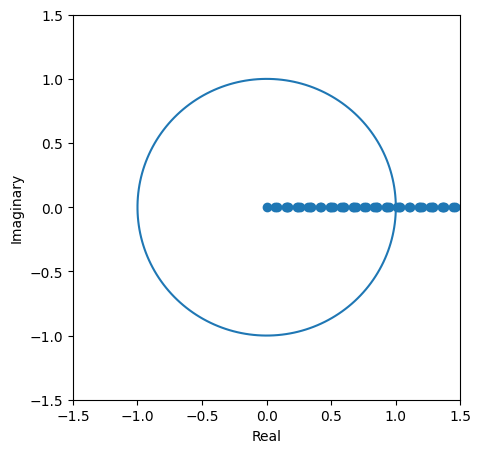

In [2]:
Ut = np.expand_dims(get_circle_obs_krylov(), axis=1)
print(f"Ut shape{Ut.shape}")
utils.plot_complex_on_unit_circle(Ut)

In [3]:
degree = 5

## MPDMD with Fourier basis

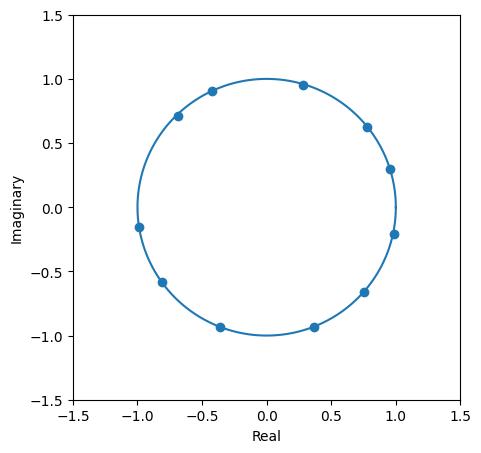

----- eigenvalue/function difference check
       original,   abs, eig diff avg
  (-0.42+0.91j),  1.00,  0.48
  (-0.69+0.71j),  0.99,  0.61
   (0.28+0.95j),  1.00,  0.35
   (0.78+0.63j),  1.00,  0.52
    (0.95+0.3j),  1.00,  0.45
   (0.98-0.21j),  1.01,  0.41
   (0.76-0.66j),  1.01,  0.44
   (0.37-0.93j),  1.00,  0.47
  (-0.36-0.94j),  1.00,  0.50
  (-0.99-0.15j),  1.00,  0.73
  (-0.81-0.58j),  1.00,  0.67
----- power difference check
 max_idx,   idx,     p, state, power diff
diff total 53.69 average  0.49 std  0.30
----- check_eigen_power_inner_product check
 max_idx,   idx,     j,     p, power inner diff
       9,     2,    10,  5.85,       1.00
       9,     3,    10,  6.06,       1.00
       9,     4,    10,  6.18,       1.00
       9,     5,    10,  0.07,       1.01
       9,     6,    10,  0.24,       1.00
       9,     7,    10,  0.40,       1.00
diff total 11.00 average  1.00 std  0.00


In [4]:
show_results(Ut, bases.fourier_basis, degree, representation=representations.mpEDMD_matrix_representation)

# EDMD with Fourier basis

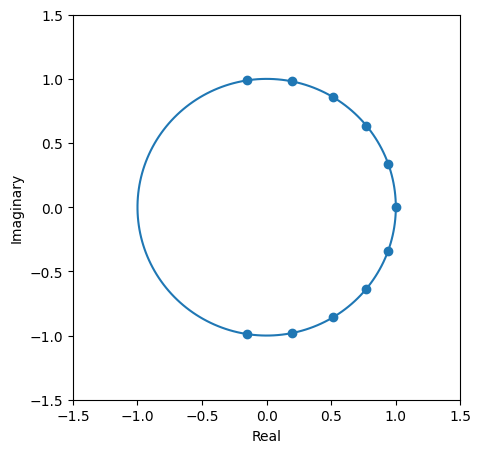

----- eigenvalue/function difference check
       original,   abs, eig diff avg
  (-0.15-0.99j),  1.00,  0.00
  (-0.15+0.99j),  1.00,  0.74
   (0.19+0.98j),  1.00,  0.51
   (0.19-0.98j),  1.00,  0.60
   (0.51+0.86j),  1.00,  0.00
   (0.51-0.86j),  1.00,  0.74
   (0.77-0.64j),  1.00,  0.74
   (0.77+0.64j),  1.00,  0.00
   (0.94-0.34j),  1.00,  0.00
         (1+0j),  1.00,  0.39
   (0.94+0.34j),  1.00,  0.60
----- power difference check
 max_idx,   idx,     p, state, power diff
diff total 53.53 average  0.49 std  0.30
----- check_eigen_power_inner_product check
 max_idx,   idx,     j,     p, power inner diff
       4,     0,    10,  4.62,       1.00
       4,     6,    10,  5.62,       1.00
       4,     9,    10,  0.00,       1.00
diff total 11.00 average  1.00 std  0.00


In [5]:
show_results(Ut, bases.fourier_basis, degree, representation=representations.EDMD_matrix_representation)

## MPEDMD with Polynomial basis

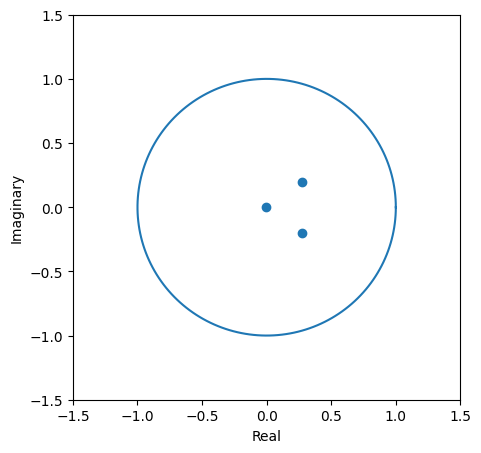

----- eigenvalue/function difference check
       original,   abs, eig diff avg
    (281.85-0j), 281.85, 21404.64
     (-7.92-0j),  7.92, 1083.28
    (0.28+0.2j),  0.34, 83.92
    (0.28-0.2j),  0.34, 61.93
        (-0+0j),  0.00, 49.18
----- power difference check
 max_idx,   idx,     p, state, power diff
diff total 574653883875216000.00 average 11493077677504320.00 std 79438227754063728.00
----- check_eigen_power_inner_product check
 max_idx,   idx,     j,     p, power inner diff
       2,     0,     4,  6.28,       1.74
diff total  4.33 average  0.87 std  0.50


In [6]:
show_results(Ut, bases.polynomial_basis, degree, representation=representations.mpEDMD_matrix_representation)

## EDMD with Polynomial basis

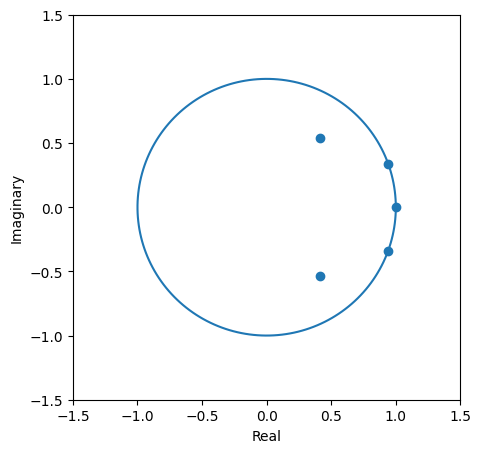

----- eigenvalue/function difference check
       original,   abs, eig diff avg
   (0.41+0.54j),  0.68, 90.90
   (0.41-0.54j),  0.68, 148.73
   (0.94+0.34j),  1.00, 97.34
         (1+0j),  1.00, 22.36
   (0.94-0.34j),  1.00,  2.01
----- power difference check
 max_idx,   idx,     p, state, power diff
diff total 16221285.70 average 324425.71 std 2096361.86
----- check_eigen_power_inner_product check
 max_idx,   idx,     j,     p, power inner diff
       4,     0,     4,  3.63,       1.30
       4,     1,     4,  2.65,       1.47
       4,     2,     4,  5.28,       1.04
diff total  4.10 average  0.82 std  0.57


In [7]:
show_results(Ut, bases.polynomial_basis, degree, representation=representations.EDMD_matrix_representation)